<a href="https://colab.research.google.com/github/MdelaVilla/MORS/blob/main/MORS_Sesion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('popular')
nltk.download('spanish_grammars')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file = ('/content/drive/MyDrive/Colab Notebooks/MORS 2324/trial_es.tsv')

In [ ]:
data = pd.read_csv(file, delimiter='\t', usecols =["text","HS"])

In [ ]:
data.head

<bound method NDFrame.head of                                                  text  HS
0   @ian_delaCalva @IrantzuVarela @pikaramagazine ...   0
1   NINGUNA MUJER ES 'PUTA' ❗❗❗ https://t.co/cV0CQ...   0
2   Editar, además de complicado, es lo que hace d...   0
3   Bien joder una puta alegría!! Te lo mereces pe...   0
4   Todo política... no se levanta la sesión y est...   0
..                                                ...  ..
95  si alguien tiene la imagen del pokemon ese bai...   0
96  El ciudadano ruso Denis Yakovlev facilitó en F...   0
97  Toy feliz porque me voy a comer 12 empanadas á...   0
98  Los Barrios, un pueblo solidario ante el "caos...   0
99  los viernes por la noche los moritos y su regg...   0

[100 rows x 2 columns]>

In [ ]:
data=data[:10]
data

,text,HS
0,@ian_delaCalva @IrantzuVarela @pikaramagazine ...,0
1,NINGUNA MUJER ES 'PUTA' ❗❗❗ https://t.co/cV0CQ...,0
2,"Editar, además de complicado, es lo que hace d...",0
3,Bien joder una puta alegría!! Te lo mereces pe...,0
4,Todo política... no se levanta la sesión y est...,0
5,Casuso callate de una puta vez https://t.co/tW...,0
6,"@BedMM @NayBetania Tú eres la culpable, perra >:v",1
7,Yo no puedo creer que las propias mujeres natu...,0
8,@DalasReview @jk_rowling Hijo de puta muerete ...,0
9,@Wachit0 @100Akshat @_Midoriyaa_ @NeohSJ La id...,0


In [ ]:
from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer()

In [ ]:
for index, row in data.iterrows():
    print(tk.tokenize(row['text']))

['@ian_delaCalva', '@IrantzuVarela', '@pikaramagazine', 'Oye', 'por', 'qué', 'no', 'molestas', 'a', 'tu', 'puta', 'madre', '?']
['NINGUNA', 'MUJER', 'ES', "'", 'PUTA', "'", '❗', '❗', '❗', 'https://t.co/cV0CQM5RIg']
['Editar', ',', 'además', 'de', 'complicado', ',', 'es', 'lo', 'que', 'hace', 'de', 'algo', 'que', 'merezca', 'la', 'pena', 'o', 'no', ',', 'porque', 'puedes', 'haber', 'grabado', 'la', 'puta', 'hostia', 'de', 'planos', ',', 'que', 'si', 'no', 'los', 'montas', 'bien', ',', 'con', 'un', 'sentido', 'y', 'los', 'maquillas', 'atractivamente', ',', 'se', 'va', 'a', 'la', 'mierda', '.']
['Bien', 'joder', 'una', 'puta', 'alegría', '!', '!', 'Te', 'lo', 'mereces', 'pequeña', '#OTGala9']
['Todo', 'política', '...', 'no', 'se', 'levanta', 'la', 'sesión', 'y', 'estos', 'hijos', 'de', 'puta', 'mandan', 'a', 'los', 'peones', 'que', 'están', 'en', 'la', 'plaza', 'y', 'provocar', 'violencia', '...', '15', 'policías', 'heridos', 'pero', 'no', 'pasa', 'nada', '...', 'si', 'esos', 'que', 'est

In [ ]:
from nltk.stem import SnowballStemmer
sp_stemmer=SnowballStemmer('spanish')
from nltk.corpus import stopwords
vocab=[]
tokens=[]
for index, row in data.iterrows():
    for word in tk.tokenize(row['text']):   #preprocesamiento: tokenizador Twitter
        if(word.isalnum()):                 #a)elimina signos
            if word not in stopwords.words('spanish'): #b) palabras vacias
                vocab.append(sp_stemmer.stem(word.lower()))  #c) minusculas y reducción a raiz
print(vocab)

['oye', 'molest', 'put', 'madr', 'ningun', 'muj', 'es', 'put', 'edit', 'ademas', 'complic', 'hac', 'merezc', 'pen', 'pued', 'hab', 'grab', 'put', 'hosti', 'plan', 'si', 'mont', 'bien', 'maquill', 'atract', 'va', 'mierd', 'bien', 'jod', 'put', 'alegr', 'te', 'merec', 'pequeñ', 'tod', 'polit', 'levant', 'sesion', 'hij', 'put', 'mand', 'peon', 'plaz', 'provoc', 'violenci', '15', 'polic', 'her', 'pas', 'si', 'ahi', 'puebl', 'dios', 'mio', 'puebl', 'viej', 'romp', 'lom', 'labur', 'casus', 'callat', 'put', 'vez', 'tu', 'culpabl', 'perr', 'v', 'yo', 'pued', 'cre', 'propi', 'mujer', 'naturalic', 'violacion', 'acos', 'justifiqu', 'muj', 'provoc', 'que', 'ment', 'mierd', 'put', 'madr', 'hij', 'put', 'mueret', 'asquer', 'merec', 'mierd', 'la', 'ide', 'poll', 'ceboll', 'obvi', 'van', 'entrar', 'desconfi', 'entraran', 'quier', 'ir', 'confianz']


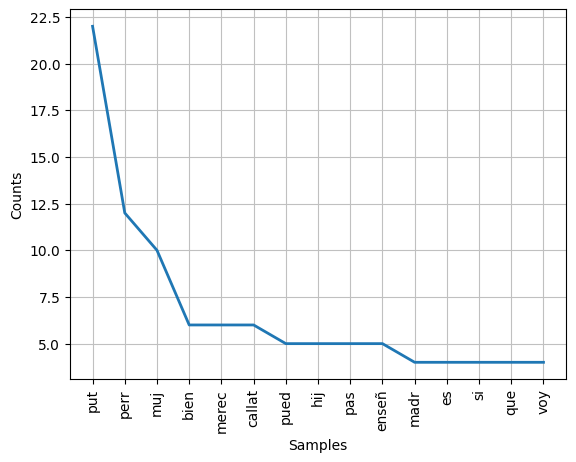

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
from nltk.probability import FreqDist
fdist=FreqDist(vocab)
fdist.keys()
fdist.plot(15, cumulative=False)

In [ ]:
nltk.download('cess_esp')
from nltk.corpus import cess_esp as cess
from nltk import UnigramTagger as ut
from nltk import BigramTagger as bt

cess_sents = cess.tagged_sents()
fraction = int(len(cess_sents)*90/100)
uni_tagger = ut(cess_sents[:fraction])
uni_tagger.evaluate(cess_sents[fraction+1:])

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.
<ipython-input-3-91046ac5d76a>:9: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  uni_tagger.evaluate(cess_sents[fraction+1:])


0.8069484240687679

In [ ]:
uni_tagger.tag("Yo soy una persona muy amable".split(" "))

[('Yo', 'pp1csn00'),
 ('soy', 'vsip1s0'),
 ('una', 'di0fs0'),
 ('persona', 'ncfs000'),
 ('muy', 'rg'),
 ('amable', None)]

In [ ]:
#Stanza

!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 25.1 MB/s eta 0:00:00


In [ ]:
import stanza
stanza.download('es')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: es (Spanish) ...


INFO:stanza:Downloaded file to /root/stanza_resources/es/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [ ]:
nlp=stanza.Pipeline('es', processors='tokenize,pos')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package         |
-------------------------------
| tokenize  | combined        |
| mwt       | combined        |
| pos       | combined_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mo

In [ ]:
doc=nlp('yo soy una persona muy amable')

In [ ]:
for sentence in doc.sentences:
  for word in sentence.words:
    print(word.text, word.pos)

yo PRON
soy AUX
una DET
persona NOUN
muy ADV
amable ADJ


Pasamos a trabajar con Bag of Words, representación numérica del Texto

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# lista de documentos de texto
text = ['Me gusta jugar al fútbol','¿Saliste a jugar al tenis?','Juan y yo jugamos al tenis, tenis']
# creamos la matriz
vectorizer = CountVectorizer()
# tokenizamos y construimos vocabulario
vectorizer.fit(text)

CountVectorizer()

In [ ]:
# resumimos
print(vectorizer.vocabulary_)

# codificamos como matriz de documentos, transformando
vector = vectorizer.transform(text)
# mostramos

print(vector.shape)
print(sorted(vectorizer.vocabulary_))
print(vector.toarray())

{'me': 6, 'gusta': 2, 'jugar': 5, 'al': 0, 'fútbol': 1, 'saliste': 7, 'tenis': 8, 'juan': 3, 'yo': 9, 'jugamos': 4}
(3, 10)
['al', 'fútbol', 'gusta', 'juan', 'jugamos', 'jugar', 'me', 'saliste', 'tenis', 'yo']
[[1 1 1 0 0 1 1 0 0 0]
 [1 0 0 0 0 1 0 1 1 0]
 [1 0 0 1 1 0 0 0 2 1]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# lista de documentos de texto
text2 = ['Me gusta jugar al fútbol','¿Saliste a jugar al tenis?','Juan y yo jugamos al tenis, tenis']
# creamos la matriz
vectorizer = TfidfVectorizer()
# tokenizamos y construimos vocabulario
vectorizer.fit(text2)
# resumimos
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# codificamos como matriz de documentos, transformando
vector = vectorizer.transform(text2)
# mostramos
print(vector.shape)
print(vector.toarray())

{'me': 6, 'gusta': 2, 'jugar': 5, 'al': 0, 'fútbol': 1, 'saliste': 7, 'tenis': 8, 'juan': 3, 'yo': 9, 'jugamos': 4}
[1.         1.69314718 1.69314718 1.69314718 1.69314718 1.28768207
 1.69314718 1.69314718 1.28768207 1.69314718]
(3, 10)
[[0.29803159 0.50461134 0.50461134 0.         0.         0.38376993
  0.50461134 0.         0.         0.        ]
 [0.37311881 0.         0.         0.         0.         0.4804584
  0.         0.63174505 0.4804584  0.        ]
 [0.2482013  0.         0.         0.42024133 0.42024133 0.
  0.         0.         0.63920872 0.42024133]]


8. Actividad

Se le pide que tome del corpus con el que vamos a trabajar en la práctica, HateEval, los 50 primero tweets. Comience a partir del resultado obtenido tras la actividad de la sesión anterior, repitiéndola para ampliar el tamaño.

1. Obtenga el bag of words para ese mini-corpus y calcule su tf·idf



In [ ]:
import pandas as pd

file = ('/content/drive/MyDrive/Colab Notebooks/MORS 2324/trial_es.tsv')
data = pd.read_csv(file, delimiter='\t', usecols =["text","HS"])
data=data[:50]
data

,text,HS
0,@ian_delaCalva @IrantzuVarela @pikaramagazine ...,0
1,NINGUNA MUJER ES 'PUTA' ❗❗❗ https://t.co/cV0CQ...,0
2,"Editar, además de complicado, es lo que hace d...",0
3,Bien joder una puta alegría!! Te lo mereces pe...,0
4,Todo política... no se levanta la sesión y est...,0
5,Casuso callate de una puta vez https://t.co/tW...,0
6,"@BedMM @NayBetania Tú eres la culpable, perra >:v",1
7,Yo no puedo creer que las propias mujeres natu...,0
8,@DalasReview @jk_rowling Hijo de puta muerete ...,0
9,@Wachit0 @100Akshat @_Midoriyaa_ @NeohSJ La id...,0


In [ ]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
for index, row in data.iterrows():
  print(tk.tokenize(row['text']))

['@ian_delaCalva', '@IrantzuVarela', '@pikaramagazine', 'Oye', 'por', 'qué', 'no', 'molestas', 'a', 'tu', 'puta', 'madre', '?']
['NINGUNA', 'MUJER', 'ES', "'", 'PUTA', "'", '❗', '❗', '❗', 'https://t.co/cV0CQM5RIg']
['Editar', ',', 'además', 'de', 'complicado', ',', 'es', 'lo', 'que', 'hace', 'de', 'algo', 'que', 'merezca', 'la', 'pena', 'o', 'no', ',', 'porque', 'puedes', 'haber', 'grabado', 'la', 'puta', 'hostia', 'de', 'planos', ',', 'que', 'si', 'no', 'los', 'montas', 'bien', ',', 'con', 'un', 'sentido', 'y', 'los', 'maquillas', 'atractivamente', ',', 'se', 'va', 'a', 'la', 'mierda', '.']
['Bien', 'joder', 'una', 'puta', 'alegría', '!', '!', 'Te', 'lo', 'mereces', 'pequeña', '#OTGala9']
['Todo', 'política', '...', 'no', 'se', 'levanta', 'la', 'sesión', 'y', 'estos', 'hijos', 'de', 'puta', 'mandan', 'a', 'los', 'peones', 'que', 'están', 'en', 'la', 'plaza', 'y', 'provocar', 'violencia', '...', '15', 'policías', 'heridos', 'pero', 'no', 'pasa', 'nada', '...', 'si', 'esos', 'que', 'est

In [ ]:
from nltk.stem import SnowballStemmer
sp_stemmer=SnowballStemmer('spanish')
from nltk.corpus import stopwords
vocab=[]
tokens=[]
mydic=[]
for index, row in data.iterrows():
    lista=[]
    for word in tk.tokenize(row['text']):   #preprocesamiento: tokenizador Twitter
        if(word.isalnum()):                 #a)elimina signos
            if word not in stopwords.words('spanish'): #b) palabras vacias
                vocab.append(sp_stemmer.stem(word.lower()))  #c) minusculas y reducción a raiz
                lista.append(sp_stemmer.stem(word.lower()))
    mydic.append(lista)
data['words']=[str (item) for item in mydic]
print(vocab)

['oye', 'molest', 'put', 'madr', 'ningun', 'muj', 'es', 'put', 'edit', 'ademas', 'complic', 'hac', 'merezc', 'pen', 'pued', 'hab', 'grab', 'put', 'hosti', 'plan', 'si', 'mont', 'bien', 'maquill', 'atract', 'va', 'mierd', 'bien', 'jod', 'put', 'alegr', 'te', 'merec', 'pequeñ', 'tod', 'polit', 'levant', 'sesion', 'hij', 'put', 'mand', 'peon', 'plaz', 'provoc', 'violenci', '15', 'polic', 'her', 'pas', 'si', 'ahi', 'puebl', 'dios', 'mio', 'puebl', 'viej', 'romp', 'lom', 'labur', 'casus', 'callat', 'put', 'vez', 'tu', 'culpabl', 'perr', 'v', 'yo', 'pued', 'cre', 'propi', 'mujer', 'naturalic', 'violacion', 'acos', 'justifiqu', 'muj', 'provoc', 'que', 'ment', 'mierd', 'put', 'madr', 'hij', 'put', 'mueret', 'asquer', 'merec', 'mierd', 'la', 'ide', 'poll', 'ceboll', 'obvi', 'van', 'entrar', 'desconfi', 'entraran', 'quier', 'ir', 'confianz', 'dos', 'amig', 'habl', 'raul', 'q', 'das', 'muj', 'nad', 'trat', 'hech', 'yo', 'respetu', 'demas', 'sol', 'recuerd', 'y', 'si', 'escori', 'culp', 'clar', 's

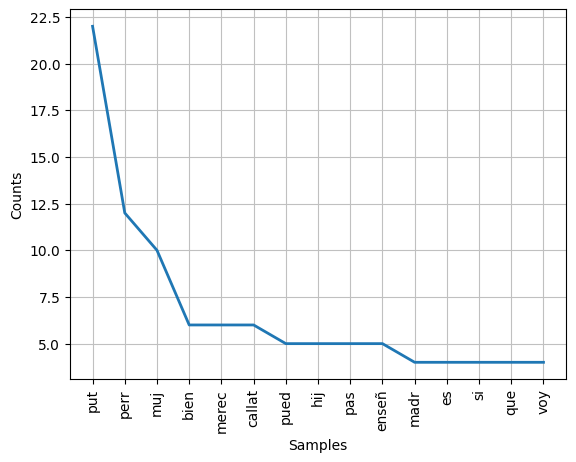

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
from nltk.probability import FreqDist
fdist=FreqDist(vocab)
fdist.keys()
fdist.plot(15, cumulative=False)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()

#tokenizamos y construimos vocabulario
X=vectorizer.fit_transform(data['words'])

#resumimos
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'oye': 221, 'molest': 197, 'put': 257, 'madr': 173, 'ningun': 210, 'muj': 204, 'es': 97, 'edit': 85, 'ademas': 3, 'complic': 45, 'hac': 129, 'merezc': 185, 'pen': 230, 'pued': 255, 'hab': 127, 'grab': 123, 'hosti': 140, 'plan': 240, 'si': 290, 'mont': 199, 'bien': 21, 'maquill': 180, 'atract': 18, 'va': 314, 'mierd': 189, 'jod': 154, 'alegr': 10, 'te': 298, 'merec': 184, 'pequeñ': 235, 'tod': 303, 'polit': 244, 'levant': 162, 'sesion': 288, 'hij': 136, 'mand': 177, 'peon': 233, 'plaz': 241, 'provoc': 251, 'violenci': 325, '15': 0, 'polic': 243, 'her': 135, 'pas': 226, 'ahi': 6, 'puebl': 254, 'dios': 78, 'mio': 193, 'viej': 322, 'romp': 276, 'lom': 168, 'labur': 160, 'casus': 32, 'callat': 28, 'vez': 320, 'tu': 310, 'culpabl': 61, 'perr': 236, 'yo': 333, 'cre': 53, 'propi': 250, 'mujer': 205, 'naturalic': 208, 'violacion': 324, 'acos': 1, 'justifiqu': 156, 'que': 258, 'ment': 183, 'mueret': 203, 'asquer': 16, 'la': 159, 'ide': 142, 'poll': 245, 'ceboll': 34, 'obvi': 216, 'van': 315, 'e

Vamos con el Aprendizaje supervisado: Clasificación

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()


In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
n_samples, n_features = iris.data.shape
print('Número de ejemplos:', n_samples)
print('Número de características:', n_features)
# sepal length, sepal width, petal length y petal width del primer ejemplo (primera flor)
print(iris.data[0])

Número de ejemplos: 150
Número de características: 4
[5.1 3.5 1.4 0.2]


In [ ]:
print(iris.data.shape)

print(iris.target.shape)


(150, 4)
(150,)


In [ ]:
import numpy as np

np.bincount(iris.target)

array([50, 50, 50])

In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


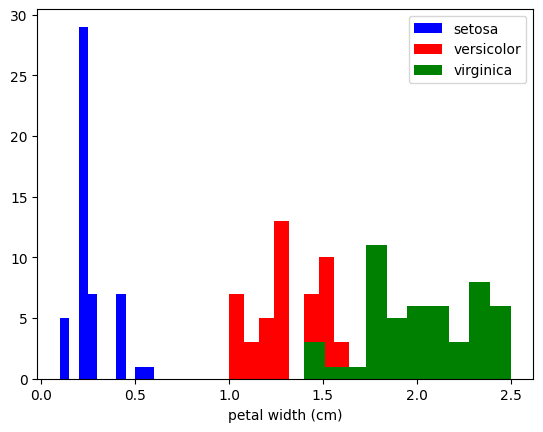

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index],
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()


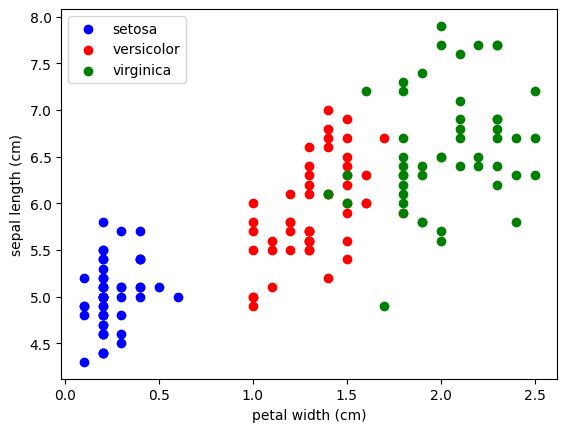

In [ ]:
x_index = 3
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index],
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

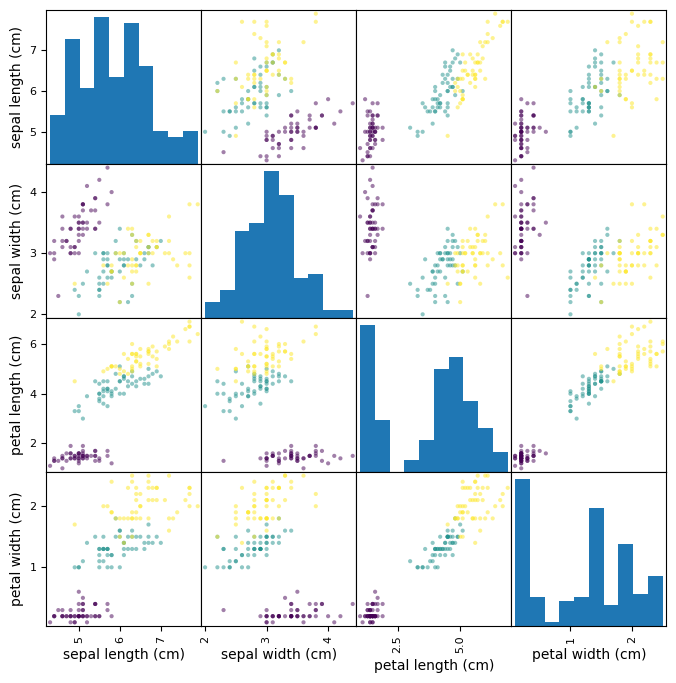

In [ ]:
import pandas as pd


iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(8, 8));


In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=123)
print("Etiquetas para los datos de entrenamiento y test")
print(train_y)
print(test_y)


Etiquetas para los datos de entrenamiento y test
[1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1
 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2
 2]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0
 2]


In [ ]:
print('Todos:', np.bincount(y) / float(len(y)) * 100.0)

print('Entrenamiento:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)


Todos: [33.33333333 33.33333333 33.33333333]
Entrenamiento: [30.66666667 40.         29.33333333]
Test: [36.         26.66666667 37.33333333]


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=123,
                                                    stratify=y)

print('Todos:', np.bincount(y) / float(len(y)) * 100.0)
print('Entrenamiento:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

Todos: [33.33333333 33.33333333 33.33333333]
Entrenamiento: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]


In [ ]:
classifier.fit(train_X, train_y)

pred_y = classifier.predict(test_X)

print("CCR [Accuracy]:")
print(np.mean(pred_y == test_y))


CCR [Accuracy]:
0.96


In [ ]:
print('Ejemplos correctamente clasificados:')

correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print('\nEjemplos incorrectamente clasificados:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)


Ejemplos correctamente clasificados:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74]

Ejemplos incorrectamente clasificados:
[44 49 60]


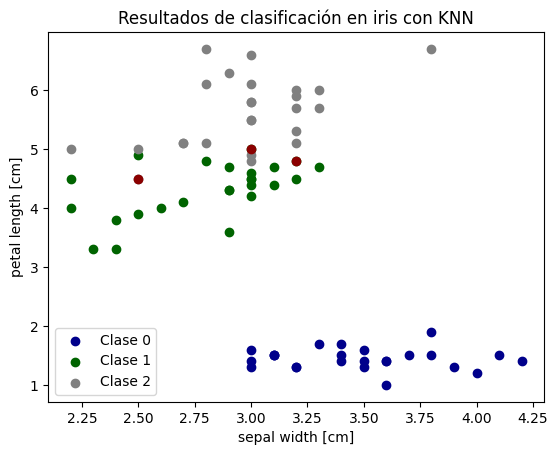

In [ ]:

# Representar en 2D

colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 1], test_X[idx, 2], color=color, label="Clase %s" % str(n))

plt.scatter(test_X[incorrect_idx, 1], test_X[incorrect_idx, 2], color="darkred")

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Resultados de clasificación en iris con KNN")
plt.show()
